<a href="https://colab.research.google.com/github/cnukaus/learner/blob/master/Lecture_2_CRoss_Industry_Standard_Process_for_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="45px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px">

<h1>CRISP-DM Methodology</h1>



# Prepare Environment

Upload your data tip:
Run git command in Colab: https://medium.com/@yuraist/how-to-upload-your-own-dataset-into-google-colab-e228727c87e9

# Explore!

## Getting Started

There is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:
According to PEP8 naming convention

In [0]:
# Python libraries
import math
import re
import datetime


# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline   

# https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline#answer-43028034
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 15 , 10



In [0]:
def plot_distribution0( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set(xlim= (0 , df[ var ].max() ) )
    facet.add_legend()
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 1940  , df[ var ].max() ) )
    facet.add_legend()
def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
# https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial

def histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( df[ var ].min() , df[ var ].max() ) )
    facet.add_legend()

def categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    
def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

### Data Loading

In [0]:
!git clone https://github.com/cnukaus/learner.git
!ls

Cloning into 'learner'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 135 (delta 0), reused 0 (delta 0), pack-reused 131
Receiving objects: 100% (135/135), 4.37 MiB | 8.68 MiB/s, done.
Resolving deltas: 100% (60/60), done.
learner  sample_data


### Get field type information

In [45]:

  
df = pd.read_csv('learner/lecture02/L2-AviationData.csv', sep=',', header=0, encoding = 'iso-8859-1')

df.sample(10)
df.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20181217X10943           Accident      GAA19CA098  2018-12-16   
1      20181217X25746           Accident      GAA19CA097  2018-12-15   
2      20181213X41114           Accident      ERA19LA065  2018-12-13   
3      20181213X45528           Accident      CEN19FA044  2018-12-13   
4      20181214X90303           Accident      GAA19CA096  2018-12-11   
5      20181210X21905           Accident      GAA19CA091  2018-12-10   
6      20181208X53536           Accident      GAA19CA090  2018-12-08   
7      20181206X45049           Accident      GAA19CA088  2018-12-05   
8      20181204X03049           Accident      GAA19CA086  2018-12-04   
9      20181212X01623           Accident      ERA19LA063  2018-12-04   
10     20181204X93009           Accident      GAA19CA087  2018-12-03   
11     20181204X05247           Accident      WPR19LA035  2018-12-02   
12     20181201X45922           

### Plot first

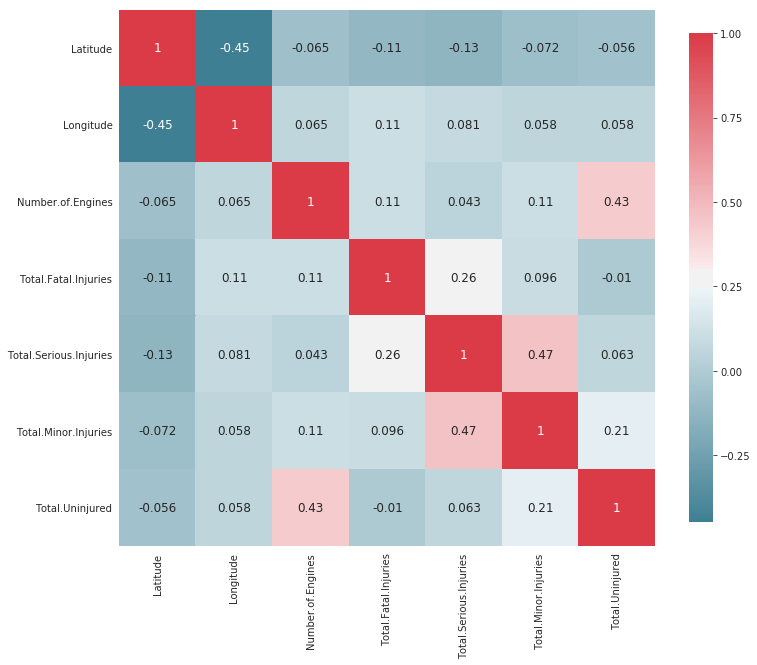

In [0]:
plot_correlation_map(df)

In [0]:
df['Year'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df['Month'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
df['Day'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

See what happens

In [0]:
#df[~df['Country']!='United States'].sample(10)
# splitting date field in the components

df['Year'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df['Month'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
df['Day'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)


df['Country_derive'] = df['Country'].apply(lambda d: d if d=='United States' else 'Foreign')

In [0]:
describe_more(df)

,Variable,Levels,Datatype
1,Investigation.Type,2,object
31,Country_derive,2,object
16,Amateur.Built,2,object
27,Weather.Condition,3,object
20,Schedule,3,object
11,Aircraft.Damage,3,object
29,Report.Status,4,object
17,Number.of.Engines,5,float64
28,Broad.Phase.of.Flight,12,object
33,Month,12,int64


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


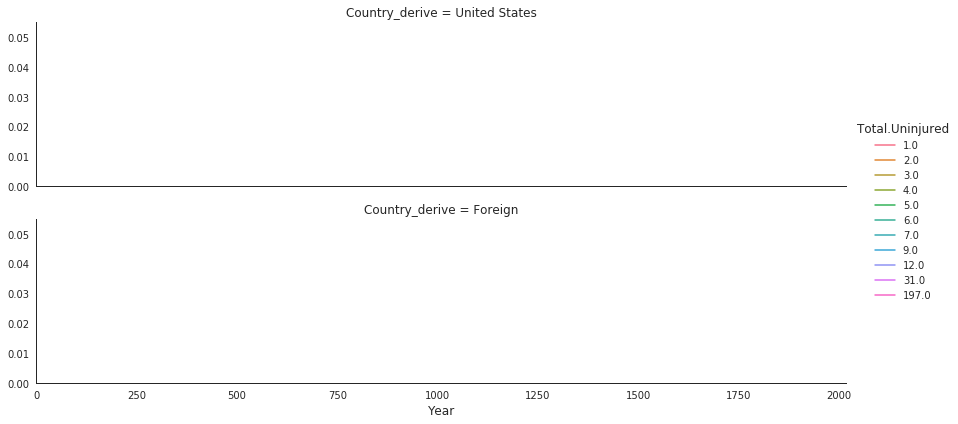

In [0]:
plot_distribution0(df[0:500],var='Year',target='Total.Uninjured',row='Country_derive')

In [48]:
df['Year'].min()

1948

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


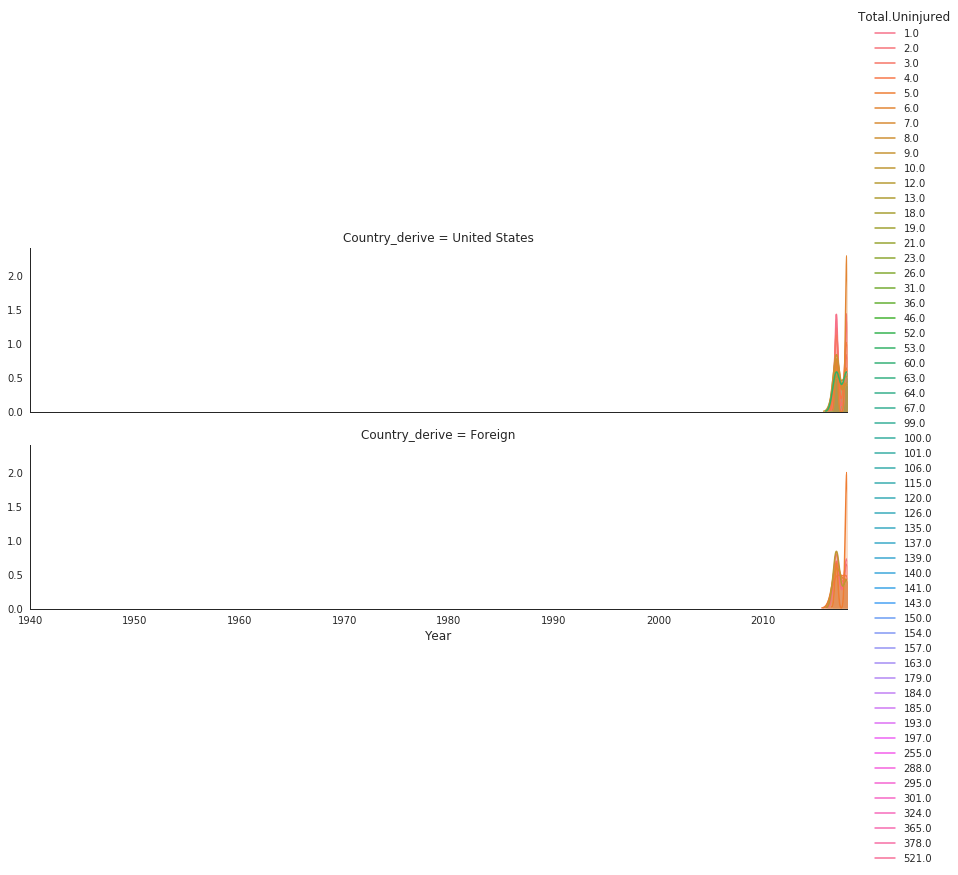

In [52]:
#df[df['Year']>1960][0:5000]['Year']
plot_distribution(df[df['Year']>1960][0:3000],var='Year',target='Total.Uninjured',row='Country_derive')

In [0]:
df.groupby(['Country_derive']).sum()#.reset_index()



,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Country_derive,,,,,,,
Foreign,2.354950e+04,-1.989426e+04,3180.0,18266.0,2540.0,3740.0,84635.0
United States,1.056490e+06,-2.665920e+06,86320.0,28920.0,15184.0,24715.0,319279.0


[uncomment the resetindex above]( https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum)


In [0]:
df.groupby(['Country_derive']).sum().reset_index()

,Country_derive,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,Foreign,2.354950e+04,-1.989426e+04,3180.0,18266.0,2540.0,3740.0,84635.0
1,United States,1.056490e+06,-2.665920e+06,86320.0,28920.0,15184.0,24715.0,319279.0


In [0]:
df.groupby(['Country_derive'])['Total.Uninjured'].agg('sum')

Country_derive
Foreign           84635.0
United States    319279.0
Name: Total.Uninjured, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


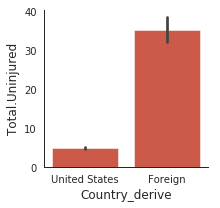

In [0]:
plot_categories(df,target='Total.Uninjured',cat='Country_derive')

### Check what kind of numeric data is there:
Big value - 销量大不一定反映真正的市场需求，也可能是各店面中介先优惠价屯行程

### Number of distinct values per fields

In [0]:
df.describe()

,Latitude,Longitude,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,28732.000000,28723.000000,78026.000000,56668.000000,54169.000000,55347.000000,68840.000000
mean,37.590133,-93.507433,1.147054,0.832675,0.327198,0.514120,5.867432
std,12.316493,39.595652,0.447324,6.225796,1.375063,2.776149,29.444289
min,-78.016945,-178.676111,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.346597,-114.927223,1.000000,0.000000,0.000000,0.000000,0.000000
50%,38.147778,-94.371667,1.000000,0.000000,0.000000,0.000000,1.000000
75%,42.533889,-81.644722,1.000000,1.000000,0.000000,1.000000,2.000000
max,89.218056,177.557778,4.000000,349.000000,111.000000,380.000000,699.000000


In [0]:

df_metadata=describe_more(df)
print(df_metadata)

                  Variable  Levels Datatype
1       Investigation.Type       2   object
16           Amateur.Built       2   object
27       Weather.Condition       3   object
20                Schedule       3   object
11         Aircraft.Damage       3   object
29           Report.Status       4   object
17       Number.of.Engines       5  float64
28   Broad.Phase.of.Flight      12   object
18             Engine.Type      13   object
12       Aircraft.Category      13   object
19         FAR.Description      18   object
21       Purpose.of.Flight      22   object
24  Total.Serious.Injuries      40  float64
25    Total.Minor.Injuries      63  float64
23    Total.Fatal.Injuries     124  float64
10         Injury.Severity     126   object
5                  Country     178   object
26         Total.Uninjured     371  float64
22             Air.Carrier    2976   object
30        Publication.Date    3813   object
14                    Make    7894   object
8             Airport.Code    98

### Review the same output, but by type of data

In [0]:
df_metadata.sort_values(by=['Datatype','Levels'])

,Variable,Levels,Datatype
17,Number.of.Engines,5,float64
24,Total.Serious.Injuries,40,float64
25,Total.Minor.Injuries,63,float64
23,Total.Fatal.Injuries,124,float64
26,Total.Uninjured,371,float64
6,Latitude,19515,float64
7,Longitude,21017,float64
1,Investigation.Type,2,object
16,Amateur.Built,2,object
27,Weather.Condition,3,object


In [0]:

type(df_metadata.index)
df_metadata.set_index("Variable", drop = False)

df_metadata

,Variable,Levels,Datatype
1,Investigation.Type,2,object
16,Amateur.Built,2,object
27,Weather.Condition,3,object
20,Schedule,3,object
11,Aircraft.Damage,3,object
29,Report.Status,4,object
17,Number.of.Engines,5,float64
28,Broad.Phase.of.Flight,12,object
18,Engine.Type,13,object
12,Aircraft.Category,13,object


In [0]:
describe_more(df).sort_values(by=['Datatype','Levels'],ascending=[True,False])

,Variable,Levels,Datatype
7,Longitude,21017,float64
6,Latitude,19515,float64
26,Total.Uninjured,371,float64
23,Total.Fatal.Injuries,124,float64
25,Total.Minor.Injuries,63,float64
24,Total.Serious.Injuries,40,float64
17,Number.of.Engines,5,float64
2,Accident.Number,82635,object
0,Event.Id,81429,object
13,Registration.Number,71407,object


## <font color='red'>以上写法有什么潜在问题？</font>

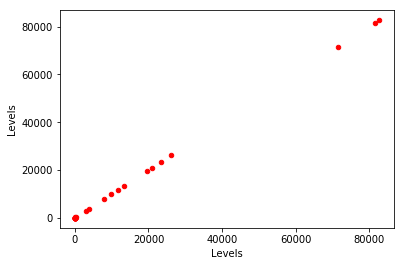

In [0]:


# a scatter plot comparing num_children and num_pets
df_metadata.plot(kind='scatter',x='Levels',y='Levels',color='red')
plt.show()

能否看着这句代码：
### df_metadata.plot(kind='scatter',x='Levels',y='Levels',color='red')

<font color='blue'>自己写下句画Bar chart?</font>

In [0]:
# Try to write your code below to draw Bar Chart:
#

# Reference answer below

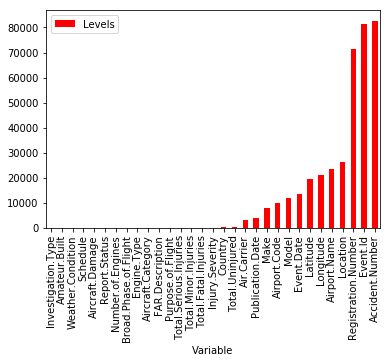

In [0]:
df_metadata.plot(kind='bar',x='Variable',y='Levels',color='red')
plt.show()

In [0]:
# Data Transformation

df['Year'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
df['Month'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
df['Day'] = df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

df = df[df['Year'] >= 1982]

In [0]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date,Year,Month,Day
0,20181217X10943,Accident,GAA19CA098,2018-12-16,"Grangville, ID",United States,45.583611,-115.681667,PVT,NaN,...,NaN,NaN,1.0,NaN,NaN,Preliminary,2018-12-18,2018,12,16
1,20181217X25746,Accident,GAA19CA097,2018-12-15,"MORIARTY, NM",United States,34.970000,-106.000000,NaN,MORIARTY MUNI,...,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-20,2018,12,15
2,20181213X41114,Accident,ERA19LA065,2018-12-13,"Punta Gorda, FL",United States,26.925278,-82.001111,PGD,Punta Gorda,...,NaN,1.0,NaN,VMC,APPROACH,Preliminary,2018-12-21,2018,12,13
3,20181213X45528,Accident,CEN19FA044,2018-12-13,"Valparaiso, IN",United States,41.451667,-87.004444,VPZ,Porter County Rgnl,...,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,2018-12-19,2018,12,13
4,20181214X90303,Accident,GAA19CA096,2018-12-11,"Hartford, WI",United States,43.330278,-88.326111,HXF,Hartford Muni,...,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-18,2018,12,11
5,20181210X21905,Accident,GAA19CA091,2018-12-10,"Chester, CT",United States,NaN,NaN,SNC,NaN,...,NaN,NaN,NaN,NaN,NaN,Preliminary,2018-12-13,2018,12,10
6,20181208X53536,Accident,GAA19CA090,2018-12-08,"Hesperia, CA",United States,34.376945,-117.316111,L26,HESPERIA,...,NaN,NaN,1.0,VMC,NaN,Preliminary,2018-12-13,2018,12,8
7,20181206X45049,Accident,GAA19CA088,2018-12-05,"Cornelia, GA",United States,NaN,NaN,AJR,NaN,...,NaN,NaN,2.0,NaN,NaN,Preliminary,2018-12-13,2018,12,5
8,20181204X03049,Accident,GAA19CA086,2018-12-04,"Reno, NV",United States,39.658889,-119.865833,RTS,RENO/STEAD,...,NaN,NaN,2.0,IMC,NaN,Preliminary,2018-12-20,2018,12,4
9,20181212X01623,Accident,ERA19LA063,2018-12-04,"Moscow, PA",United States,41.326945,-75.591111,NaN,NaN,...,NaN,NaN,1.0,VMC,CRUISE,Preliminary,2018-12-19,2018,12,4


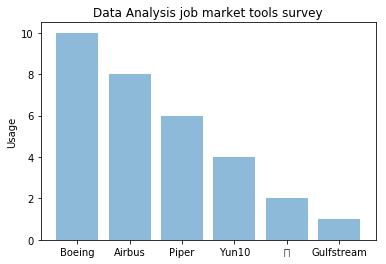

In [0]:


objects = ('Boeing','Airbus','Piper','Yun10','运','Gulfstream')
    #'SQL', 'Java', 'Python', 'Alteryx', 'Power BI', 'R')
y_pos = np.arange(len(objects))
#print(y_pos)
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Data Analysis job market tools survey')

plt.show()

In [0]:
print("\\")

\


两种过滤Data Frame办法

In [0]:
categories=df_metadata[df_metadata['Datatype']=="object"]['Variable']

Flag_category=df_metadata['Datatype']=="object"

print (categories)

countries=df['Country']

#countries=countries[~np.isnan(countries)]
countries.drop_duplicates( keep='first', inplace=True)
print("There are %s countries:"%countries.count())
print (countries)

1        Investigation.Type
16            Amateur.Built
27        Weather.Condition
20                 Schedule
11          Aircraft.Damage
29            Report.Status
28    Broad.Phase.of.Flight
18              Engine.Type
12        Aircraft.Category
19          FAR.Description
21        Purpose.of.Flight
10          Injury.Severity
5                   Country
22              Air.Carrier
30         Publication.Date
14                     Make
8              Airport.Code
15                    Model
3                Event.Date
9              Airport.Name
4                  Location
13      Registration.Number
0                  Event.Id
2           Accident.Number
Name: Variable, dtype: object
There are 178 countries:
0                         United States
16                         South Africa
20                            Indonesia
28                               Brazil
29                             Ethiopia
32                            Australia
37                   Dominican Re

/usr/local/lib/python3.6/dist-packages/pandas/core/base.py:1512: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self._update_inplace(result)


def category_values(dataframe, categories):
    for c in categories:
        print('\n', dataframe.groupby(by=c)[c].count().sort_values(ascending=False))
        print('Nulls: ', dataframe[c].isnull().sum())

## TOO LONG DNR

In [0]:
for c in categories:
    print(c , df[c].unique())

#df[df['first_name'].notnull() & (df['nationality'] == "USA")]

Investigation.Type ['Accident' 'Incident' nan]
Amateur.Built ['No' 'Yes' nan]
Weather.Condition [nan 'VMC' 'IMC' 'UNK']
Schedule [nan 'SCHD' 'NSCH' 'UNK']
Aircraft.Damage ['Substantial' 'Destroyed' 'Minor' nan]
Report.Status ['Preliminary' 'Foreign' 'Factual' 'Probable Cause']
Broad.Phase.of.Flight [nan 'APPROACH' 'TAKEOFF' 'CRUISE' 'LANDING' 'GO-AROUND' 'UNKNOWN' 'TAXI'
 'OTHER' 'DESCENT' 'MANEUVERING' 'STANDING' 'CLIMB']
Engine.Type [nan 'Reciprocating' 'Turbo Jet' 'Turbo Fan' 'Turbo Prop' 'Turbo Shaft'
 'Unknown' 'None' 'Electric' 'REC, ELEC' 'Hybrid Rocket' 'REC, TJ, TJ'
 'REC, TJ, REC, TJ' 'TJ, REC, REC, TJ']
Aircraft.Category ['Airplane' 'Helicopter' 'Gyroplane' nan 'Balloon' 'Unknown'
 'Weight-Shift' 'Glider' 'Ultralight' 'Powered Parachute' 'Blimp'
 'Powered-Lift' 'Gyrocraft' 'Rocket']
FAR.Description ['Part 91: General Aviation' 'Non-U.S., Non-Commercial'
 'Part 135: Air Taxi & Commuter' 'Part 137: Agricultural'
 'Non-U.S., Commercial' 'Part 133: Rotorcraft Ext. Load' 'Unknown

## <font color='red'>Will fail</font>

In [0]:
for c in categories:
    print(c , df[c].unique().sample(5))

AttributeError: ignored

In [0]:
df[countries]
   

ValueError: ignored

In [0]:
category_values(df, categories)
#print(countries)
#category_values(df, countries)


 Investigation.Type
Accident    79282
Incident     3345
Name: Investigation.Type, dtype: int64
Nulls:  1

 Amateur.Built
No     73946
Yes     8055
Name: Amateur.Built, dtype: int64
Nulls:  627

 Weather.Condition
VMC    73108
IMC     5781
UNK     1031
Name: Weather.Condition, dtype: int64
Nulls:  2708

 Schedule
UNK     4099
NSCH    3983
SCHD    3647
Name: Schedule, dtype: int64
Nulls:  70899

 Aircraft.Damage
Substantial    59650
Destroyed      17780
Minor           2606
Name: Aircraft.Damage, dtype: int64
Nulls:  2592

 Report.Status
Probable Cause    76093
Foreign            4503
Preliminary        1458
Factual             574
Name: Report.Status, dtype: int64
Nulls:  0

 Broad.Phase.of.Flight
LANDING        20115
TAKEOFF        15935
CRUISE         10966
MANEUVERING    10189
APPROACH        8010
TAXI            2413
CLIMB           2339
DESCENT         2278
GO-AROUND       1678
STANDING        1276
UNKNOWN          756
OTHER            170
Name: Broad.Phase.of.Flight, dtype: int64

ValueError: ignored

In [0]:
print(df.groupby(['Make','Amateur.Built']).count())
#print(df.groupby(['Weather.Condition','Aircraft.Damage']).count())


                                        Event.Id  Investigation.Type  \
Make                     Amateur.Built                                 
107.5 Flying Corporation Yes                   1                   1   
1200                     No                    1                   1   
177MF LLC                Yes                   1                   1   
1977 COLFER-CHAN         Yes                   1                   1   
1ST FTR GP               Yes                   1                   1   
2001 MCGIRL              Yes                   1                   1   
2003 Nash                Yes                   1                   1   
2007 Savage Air LLC      Yes                   1                   1   
3XTRIM                   No                    1                   1   
67 FLYING DUTCHMAN       Yes                   1                   1   
781569 INC               Yes                   1                   1   
85 MANISTA               Yes                   1                

In [0]:
producers = [x for x in df['Weather.Condition'][df['Aircraft.Damage']== 'No'].unique() ]
amateurs  = [x for x in df['Weather.Condition'][df['Aircraft.Damage']== 'Yes'].unique() ]

# -----------------------------------------------
# Function that fixes the null in amateur.built
def fix_amateur_built(ab, m):
    if type(ab) == str:
        return ab
    else:
        if m in producers:
            return 'No'
        else:
            return 'Yes'
# Fix for Amateur.Built field      
am_built = df.apply(lambda x: fix_amateur_built(x['Amateur.Built'], x['Make']), axis=1)
df = df.assign(AmateurBuilt = am_built, index=df.index)

In [0]:
print(df.groupby(['Make','Model']).count())

                                               Event.Id  Investigation.Type  \
Make                     Model                                                
107.5 Flying Corporation One Design DR 107            1                   1   
1200                     G103                         1                   1   
177MF LLC                PITTS MODEL 12               1                   1   
1977 COLFER-CHAN         STEEN SKYBOLT                1                   1   
1ST FTR GP               FOCKE-WULF 190               1                   1   
2000 McCoy               Genesis                      1                   1   
2001 MCGIRL              QUESTAIR VENTURE             1                   1   
2003 Nash                Kitfox II                    1                   1   
2007 Savage Air LLC      EPIC LT                      1                   1   
3XTRIM                   450 ULTRA                    1                   1   
67 FLYING DUTCHMAN       D1/LFD-13                  

In [0]:
# Function that fixes the null in number.of.engines 
def fix_number_of_engines(noe, m):
    if noe >= 0:
        return noe
    else:
        # Setting number of engines at the mean number of engines for the producer
        r = np.round(df['Number.of.Engines'][df['Make']==m].mean())
        return r

# Setting 0 engines for balloons
df['Number.of.Engines'][df['Number.of.Engines'].isnull() & (df['Make'].str.contains('balloon', case=False))] = 0.0
# Correcting number of engines
num_engines = df.apply(lambda x: fix_number_of_engines(x['Number.of.Engines'], x['Make']), axis=1)
df = df.assign(NumberofEngines = num_engines, index=df.index)
# Still some null after number of engines correction
df['NumberofEngines'].fillna(1, inplace=True)

In [0]:
df=pd.DataFrame({"A":[14,4,5,4,1], 
                 "B":[5,2,54,3,2], 
                 "C":[20,20,7,3,8], 
                 "D":[14,3,6,2,6]}) 
df

In [0]:
def fix_engine_type(et, model):
    if type(et) == str:
        return et
    else:
        # Setting engine type at the mode of engines for the model
        e = (df['Engine.Type'][df['Model']==model].mode())
        return  e[0] if e.count() > 0 else 'Unknown'
# Fix for Engine.Type field      
en_type = df.apply(lambda x: fix_engine_type(x['Engine.Type'], x['Model']), axis=1)
df = df.assign(EngineType = en_type, index=df.index)

In [0]:
def fix_aircraft_category(cat, model):
    if type(cat) == str:
        return cat
    else:
        # Setting aircraft category at the mode of caterogories for the model
        e = (df['Aircraft.Category'][df['Model']==model].mode())
        return  e[0] if e.count() > 0 else 'Unknown'
# Fix for Aircraft.Category field      
aircraft_cat = df.apply(lambda x: fix_aircraft_category(x['Aircraft.Category'], x['Model']), axis=1)
df = df.assign(AircraftCategory = aircraft_cat, index=df.index)

In [0]:
# null damages can't be defined
df[df['Aircraft.Damage'].isnull()]
df['Aircraft.Damage'].fillna('Unknown', inplace=True)

# Fixing phase of flight nulls
df['Broad.Phase.of.Flight'].fillna('UNKNOWN', inplace=True)

# Fixing weather conditions
df['Weather.Condition'].fillna('UNK', inplace=True)

# null categories can't be defined
df['Aircraft.Category'].fillna('Unknown', inplace=True)

# can't define purpose of flight
df['Purpose.of.Flight'].fillna('Unknown', inplace=True)

# don't know ho to set missing schedules 
df['Schedule'].fillna('UNK', inplace=True)

# don't know ho to set missing FAR.Description
df['FAR.Description'].fillna('Unknown', inplace=True)

# don't know ho to set missing Aircraft.Damage
df['Aircraft.Damage'].fillna('Unknown', inplace=True)

# don't know ho to set missing Air Carriers
df['Air.Carrier'].fillna('Unknown', inplace=True)

# don't know ho to set missing Makers
df['Make'].fillna('UNKNOWN', inplace=True)

# don't know ho to set missing Models
df['Model'].fillna('Unknown', inplace=True)

# don't know ho to set missing airport names
df['Airport.Name'].fillna('Unknown', inplace=True)

# don't know ho to set missing Models
df['Airport.Code'].fillna('Unknown', inplace=True)

# don't know ho to set missing Locations
df['Location'].fillna('Unknown', inplace=True)

In [0]:
# How many still null
df.isnull().sum()

Event.Id                      0
Investigation.Type            1
Accident.Number               0
Event.Date                    0
Location                      0
Country                     507
Latitude                  53903
Longitude                 53912
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.Damage               0
Aircraft.Category             0
Registration.Number        3582
Make                          0
Model                         0
Amateur.Built               627
Number.of.Engines          4609
Engine.Type                3982
FAR.Description               0
Schedule                      0
Purpose.of.Flight             0
Air.Carrier                   0
Total.Fatal.Injuries      25967
Total.Serious.Injuries    28466
Total.Minor.Injuries      27288
Total.Uninjured           13795
Weather.Condition             0
Broad.Phase.of.Flight         0
Report.Status                 0
Publication.Date          14014
dtype: i

## More Resources

Learn how to make the most of Python, Jupyter, Colaboratory, and related tools with these resources:

### Working with Notebooks in Colaboratory
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)
- [First steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Intro to neural nets](/notebooks/mlcc/intro_to_neural_nets.ipynb)
- [Intro to sparse data and embeddings](/notebooks/mlcc/intro_to_sparse_data_and_embeddings.ipynb)

### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

## Machine Learning Examples: Seedbank

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out the [Seedbank](https://research.google.com/seedbank/) project.

A few featured examples:

- [Neural Style Transfer](https://research.google.com/seedbank/seed/neural_style_transfer_with_tfkeras): Use deep learning to transfer style between images.
- [EZ NSynth](https://research.google.com/seedbank/seed/ez_nsynth): Synthesize audio with WaveNet auto-encoders.
- [Fashion MNIST with Keras and TPUs](https://research.google.com/seedbank/seed/fashion_mnist_with_keras_and_tpus): Classify fashion-related images with deep learning.
- [DeepDream](https://research.google.com/seedbank/seed/deepdream): Produce DeepDream images from your own photos.
- [Convolutional VAE](https://research.google.com/seedbank/seed/convolutional_vae): Create a generative model of handwritten digits.